# Module 02: Calculus and Multivariable Calculus for Machine Learning

التفاضل والتفاضل المتعدد المتغيرات لتعلم الآلة

> **Note**: Content should be populated from `course-content/02.pptx`

---

## 🔗 Building on Module 01

**Welcome back!** In Module 01, you learned about vectors, matrices, and linear transformations. Now we'll use those concepts:

- **Vectors from Module 01** → **Gradient vectors** (this module)
- **Matrix operations from Module 01** → **Jacobian matrices** for multivariable functions
- **Linear transformations** → **How data flows** through neural networks

> 💡 **Connection**: When we compute gradients, we're working with vectors and matrices you learned in Module 01!

**What's Next**: After this module, you'll use gradients in Module 03 for optimization algorithms.

---

## Learning Objectives

In this module, you will learn:
- Derivatives and their applications in machine learning
- Gradients and partial derivatives for multivariable functions
- The chain rule and its role in backpropagation
- How to compute gradients in Python using NumPy and automatic differentiation
- How calculus enables optimization in ML algorithms
- Understanding loss functions and their derivatives

---

# Part 1: WHY

## Understanding the Motivation

### Why does Calculus matter for Machine Learning?

Calculus is essential for training machine learning models. Here's why:

- **Optimization**: ML models are trained by minimizing loss functions using derivatives
- **Gradients**: Gradients tell us which direction to adjust parameters to reduce error
- **Backpropagation**: Neural networks use the chain rule to compute gradients through layers
- **Learning Rate**: Understanding derivatives helps tune learning rates effectively
- **Convergence**: Calculus helps understand when and how models converge to optimal solutions

### Real-World Applications

- **Neural Network Training**: Backpropagation relies entirely on calculus
- **Gradient Descent**: The most fundamental optimization algorithm in ML
- **Loss Function Minimization**: All supervised learning uses derivatives
- **Hyperparameter Tuning**: Understanding gradients helps optimize hyperparameters
- **Feature Engineering**: Derivatives help understand feature importance

**TODO**: Add more specific examples from your PowerPoint slides

In [1]:
# Example: Why Calculus matters in ML
import numpy as np
import matplotlib.pyplot as plt

# Example: Understanding loss functions and optimization
# In ML, we want to minimize a loss function
def simple_loss_function(x):
    """A simple quadratic loss function"""
    return (x - 3)**2 + 2

# The derivative tells us the direction to minimize
def loss_derivative(x):
    """Derivative of the loss function"""
    return 2 * (x - 3)

# Example: Finding the minimum
x_values = np.linspace(0, 6, 100)
loss_values = [simple_loss_function(x) for x in x_values]

print("Loss function example:")
print(f"At x=2, loss = {simple_loss_function(2):.2f}, derivative = {loss_derivative(2):.2f}")
print(f"At x=4, loss = {simple_loss_function(4):.2f}, derivative = {loss_derivative(4):.2f}")
print("\nThe derivative tells us which direction to move to minimize loss!")
print("This is exactly how gradient descent works in ML!")

Loss function example:
At x=2, loss = 3.00, derivative = -2.00
At x=4, loss = 3.00, derivative = 2.00

The derivative tells us which direction to move to minimize loss!
This is exactly how gradient descent works in ML!


---

# Part 2: HOW

## Implementation and Practical Application

### How Calculus Works in Machine Learning

Let's understand **HOW** calculus operations work and **WHY** each is essential:

#### 1. **WHY Derivatives?**
- **WHY**: Tell us the direction to minimize loss (which way to adjust parameters)
- **HOW**: Derivative = rate of change = slope of the function
  - Positive derivative → function increasing → move left
  - Negative derivative → function decreasing → move right
  - Zero derivative → at minimum/maximum

#### 2. **WHY Gradients?**
- **WHY**: ML models have many parameters - need direction for each
- **HOW**: Gradient = vector of partial derivatives
  - Each element = how loss changes with respect to one parameter
  - Points in direction of steepest increase
  - Negative gradient = direction of steepest decrease (what we want!)

#### 3. **WHY Chain Rule?**
- **WHY**: Neural networks have multiple layers - need to compute gradients through all layers
- **HOW**: Chain rule allows us to:
  - Compute gradient of output w.r.t. input
  - Multiply gradients through each layer
  - This is **backpropagation**!

#### 4. **WHY Gradient Descent?**
- **WHY**: Find optimal parameters that minimize loss
- **HOW**: Iteratively update parameters:
  1. Compute gradient (direction of steepest increase)
  2. Move in opposite direction (steepest decrease)
  3. Repeat until convergence

### Step-by-Step: Working with Calculus in Python for ML

**TODO**: Add detailed step-by-step explanation from your PowerPoint. Here's a basic structure:

1. **Derivatives**: Computing derivatives of functions
2. **Gradients**: Understanding and computing gradients for multivariable functions
3. **Partial Derivatives**: Working with functions of multiple variables
4. **Chain Rule**: Understanding and applying the chain rule
5. **Gradient Descent**: Implementing gradient descent for optimization
6. **Automatic Differentiation**: Using libraries for automatic gradient computation

### Key Concepts to Cover:

- Single-variable derivatives
- Multivariable functions and partial derivatives
- Gradient vectors
- The chain rule and backpropagation
- Gradient descent algorithm
- Learning rate and convergence

In [2]:
# Example: Basic Calculus Operations in Python for ML
# This shows HOW each calculus concept works and WHY it's used

import numpy as np
from scipy.misc import derivative

print("=" * 60)
print("HOW Calculus Works in Machine Learning")
print("=" * 60)

# 1. Computing derivatives
# WHY: Derivatives tell us which direction to move to minimize loss
# HOW: Derivative = rate of change = slope
def f(x):
    return x**2 + 3*x + 2

x0 = 2.0
deriv = derivative(f, x0, dx=1e-6)
analytical = 2*x0 + 3  # d/dx(x² + 3x + 2) = 2x + 3

print("\n1. Derivatives (Finding Direction to Minimize):")
print(f"   Function: f(x) = x² + 3x + 2")
print(f"   At x = {x0}:")
print(f"   - Function value: f({x0}) = {f(x0):.2f}")
print(f"   - Derivative: {deriv:.4f} (numerical)")
print(f"   - Derivative: {analytical:.4f} (analytical)")
print(f"   WHY: Derivative tells us if function is increasing/decreasing")
print(f"   HOW: Positive = increasing (move left), Negative = decreasing (move right)")

# 2. Gradients (multivariable derivatives)
# WHY: ML models have many parameters - need direction for each
# HOW: Gradient = vector of partial derivatives
def multivariable_function(x, y):
    return x**2 + y**2 + x*y

def partial_x(x, y):
    """Partial derivative w.r.t. x"""
    return 2*x + y  # d/dx(x² + y² + xy) = 2x + y

def partial_y(x, y):
    """Partial derivative w.r.t. y"""
    return 2*y + x  # d/dy(x² + y² + xy) = 2y + x

def gradient(x, y):
    """Gradient vector = [∂f/∂x, ∂f/∂y]"""
    return np.array([partial_x(x, y), partial_y(x, y)])

x_val, y_val = 1.0, 2.0
grad = gradient(x_val, y_val)

print("\n2. Gradients (Direction for Multiple Parameters):")
print(f"   Function: f(x, y) = x² + y² + xy")
print(f"   At point ({x_val}, {y_val}):")
print(f"   - Function value: {multivariable_function(x_val, y_val):.2f}")
print(f"   - Gradient vector: {grad}")
print(f"   WHY: Gradient points in direction of steepest increase")
print(f"   HOW: Each element = how f changes w.r.t. that parameter")
print(f"   - ∂f/∂x = {partial_x(x_val, y_val):.2f} (change w.r.t. x)")
print(f"   - ∂f/∂y = {partial_y(x_val, y_val):.2f} (change w.r.t. y)")

# 3. Gradient Descent (HOW optimization works)
# WHY: Find optimal parameters that minimize loss
# HOW: Iteratively move in direction opposite to gradient
def gradient_descent_step(x, learning_rate=0.1):
    """One step of gradient descent for f(x) = x²"""
    grad = 2 * x  # derivative of x²
    return x - learning_rate * grad  # Move opposite to gradient

print("\n3. Gradient Descent (HOW Models Learn):")
print(f"   Minimizing f(x) = x² (loss function)")
print(f"   Starting at x = 5.0, learning rate = 0.1")
print(f"   WHY: We want to find x that minimizes f(x)")
print(f"   HOW: Move in direction opposite to gradient")
print(f"\n   Iteration process:")
x = 5.0
for i in range(5):
    old_x = x
    grad = 2 * x
    x = gradient_descent_step(x)
    print(f"   Step {i+1}: x = {old_x:.4f} → {x:.4f}, gradient = {grad:.4f}, f(x) = {x**2:.4f}")

print(f"\n   ✅ Converging to minimum at x = 0!")

# TODO: Add more examples from your slides:
# - Chain rule examples (with detailed explanation)
# - Backpropagation intuition (step-by-step)
# - Multivariable optimization
# - Learning rate effects

HOW Calculus Works in Machine Learning

1. Derivatives (Finding Direction to Minimize):
   Function: f(x) = x² + 3x + 2
   At x = 2.0:
   - Function value: f(2.0) = 12.00
   - Derivative: 7.0000 (numerical)
   - Derivative: 7.0000 (analytical)
   WHY: Derivative tells us if function is increasing/decreasing
   HOW: Positive = increasing (move left), Negative = decreasing (move right)

2. Gradients (Direction for Multiple Parameters):
   Function: f(x, y) = x² + y² + xy
   At point (1.0, 2.0):
   - Function value: 7.00
   - Gradient vector: [4. 5.]
   WHY: Gradient points in direction of steepest increase
   HOW: Each element = how f changes w.r.t. that parameter
   - ∂f/∂x = 4.00 (change w.r.t. x)
   - ∂f/∂y = 5.00 (change w.r.t. y)

3. Gradient Descent (HOW Models Learn):
   Minimizing f(x) = x² (loss function)
   Starting at x = 5.0, learning rate = 0.1
   WHY: We want to find x that minimizes f(x)
   HOW: Move in direction opposite to gradient

   Iteration process:
   Step 1: x = 5

/var/folders/7n/l2c2z2x57871xg4f_0drsv1m0000gn/T/ipykernel_24647/3704024433.py:18: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  deriv = derivative(f, x0, dx=1e-6)


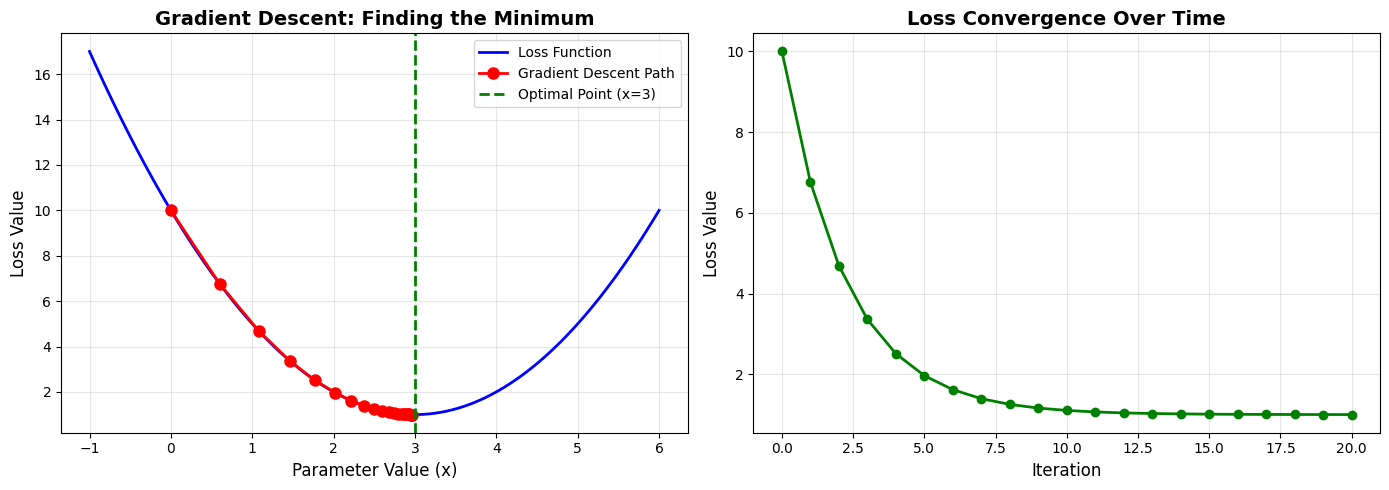

📊 Visual Analysis:
Left plot: Shows how gradient descent moves toward the minimum
Right plot: Shows how loss decreases over iterations

Key Observations:
✅ Started at x = 0.00, loss = 10.00
✅ Ended at x = 2.97, loss = 1.00
✅ Optimal is x = 3.0, loss = 1.00
✅ Converged in 20 iterations

💡 This is exactly how ML models learn!
   - They start with random parameters
   - Follow gradients to reduce loss
   - Converge to optimal values


In [3]:
# Interactive Example: Gradient Descent Visualization
# VISUAL: See gradient descent in action!

import numpy as np
import matplotlib.pyplot as plt

# Example: Visualizing gradient descent on a loss function
def loss_function(x):
    return (x - 3)**2 + 1

def loss_gradient(x):
    return 2 * (x - 3)

# Gradient descent
x = 0.0  # Starting point
learning_rate = 0.1
iterations = 20
path = [x]
loss_path = [loss_function(x)]

for i in range(iterations):
    grad = loss_gradient(x)
    x = x - learning_rate * grad
    path.append(x)
    loss_path.append(loss_function(x))

# Visualize the optimization process
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Loss function with gradient descent path
x_range = np.linspace(-1, 6, 100)
y_range = [loss_function(x) for x in x_range]

ax1.plot(x_range, y_range, 'b-', linewidth=2, label='Loss Function')
ax1.plot(path, loss_path, 'ro-', linewidth=2, markersize=8, label='Gradient Descent Path')
ax1.axvline(x=3, color='g', linestyle='--', linewidth=2, label='Optimal Point (x=3)')
ax1.set_xlabel('Parameter Value (x)', fontsize=12)
ax1.set_ylabel('Loss Value', fontsize=12)
ax1.set_title('Gradient Descent: Finding the Minimum', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Convergence over iterations
ax2.plot(range(len(loss_path)), loss_path, 'g-o', linewidth=2, markersize=6)
ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('Loss Value', fontsize=12)
ax2.set_title('Loss Convergence Over Time', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Visual Analysis:")
print("=" * 60)
print("Left plot: Shows how gradient descent moves toward the minimum")
print("Right plot: Shows how loss decreases over iterations")
print("\nKey Observations:")
print(f"✅ Started at x = {path[0]:.2f}, loss = {loss_path[0]:.2f}")
print(f"✅ Ended at x = {path[-1]:.2f}, loss = {loss_path[-1]:.2f}")
print(f"✅ Optimal is x = 3.0, loss = {loss_function(3):.2f}")
print(f"✅ Converged in {iterations} iterations")
print("\n💡 This is exactly how ML models learn!")
print("   - They start with random parameters")
print("   - Follow gradients to reduce loss")
print("   - Converge to optimal values")

### Best Practices

**TODO**: Add best practices and tips from your slides. Example structure:

- **Learning Rate**: Start with small values (0.01-0.1) and adjust based on convergence
- **Gradient Checking**: Verify gradients numerically when implementing from scratch
- **Normalization**: Normalize features to help gradient descent converge faster
- **Batch Processing**: Use mini-batches for large datasets to compute gradients efficiently
- **Momentum**: Consider using momentum to smooth gradient updates

---

# Part 3: AFTER

## Analyzing Results and Understanding Implications

### What Happens Next?

After understanding calculus fundamentals:

- **Optimization Ready**: You understand how ML models are trained through optimization
- **Backpropagation**: You're ready to understand how neural networks compute gradients
- **Hyperparameter Tuning**: You can tune learning rates and other optimization parameters
- **Next Module**: Optimization techniques build on these calculus concepts

### How This Connects to Machine Learning

- **Training Process**: All ML training uses gradient-based optimization
- **Neural Networks**: Backpropagation is the chain rule applied to neural networks
- **Loss Functions**: Understanding derivatives helps design better loss functions
- **Convergence**: Calculus helps diagnose and fix convergence issues

**TODO**: Add more analysis and implications from your slides

In [4]:
# Example: Understanding the Results and Implications

import numpy as np

# Example: Analyzing gradient descent convergence
def analyze_convergence(learning_rates):
    """Analyze how different learning rates affect convergence"""
    results = {}
    
    for lr in learning_rates:
        x = 5.0
        iterations_to_converge = 0
        for i in range(100):
            if abs(x - 3.0) < 0.001:  # Converged to optimal
                iterations_to_converge = i
                break
            x = x - lr * 2 * (x - 3)  # Gradient descent for (x-3)²
        results[lr] = iterations_to_converge
    
    print("Learning Rate vs Convergence:")
    for lr, iters in results.items():
        print(f"LR = {lr:.2f}: Converged in {iters} iterations")
    
    print("\nKey Insights:")
    print("- Too small LR: Slow convergence")
    print("- Too large LR: May overshoot or diverge")
    print("- Optimal LR: Fast convergence without overshooting")

analyze_convergence([0.01, 0.1, 0.5, 1.0])

# TODO: Add visualization code from your slides
# TODO: Add analysis of backpropagation
# TODO: Show real ML training examples

Learning Rate vs Convergence:
LR = 0.01: Converged in 0 iterations
LR = 0.10: Converged in 35 iterations
LR = 0.50: Converged in 1 iterations
LR = 1.00: Converged in 0 iterations

Key Insights:
- Too small LR: Slow convergence
- Too large LR: May overshoot or diverge
- Optimal LR: Fast convergence without overshooting


### Common Pitfalls and How to Avoid Them

**TODO**: Add common mistakes and solutions from your slides. Example structure:

1. **Learning Rate Too High**: Causes divergence or oscillation
   - Solution: Start with smaller learning rates and use learning rate schedules

2. **Vanishing/Exploding Gradients**: Common in deep networks
   - Solution: Use proper initialization, batch normalization, gradient clipping

3. **Local Minima**: Gradient descent may get stuck
   - Solution: Use momentum, different initialization, or stochastic methods

### Advanced Topics

**TODO**: Add advanced concepts from your slides. Example structure:

- **Automatic Differentiation**: Using libraries like PyTorch/TensorFlow for gradients
- **Second-Order Methods**: Newton's method, quasi-Newton methods
- **Constrained Optimization**: Lagrange multipliers for ML with constraints
- **Stochastic Gradient Descent**: Variants like Adam, RMSprop

---

# Summary

## Key Takeaways

**TODO**: Summarize the main points from your slides. Example structure:

1. **Derivatives and Gradients**: Essential for understanding how ML models learn
2. **Gradient Descent**: The fundamental optimization algorithm in ML
3. **Chain Rule**: The mathematical foundation of backpropagation
4. **Multivariable Calculus**: Needed for optimizing models with many parameters

## 🔗 How This Connects to Other Modules

**What you learned here connects to:**

- **Module 01**: Used vectors/matrices to compute gradients (gradients are vectors!)
- **Module 03**: You learned HOW to compute gradients → Module 03 teaches HOW to USE them for optimization
- **Module 04**: Optimization techniques will help find optimal reduced dimensions
- **Module 05**: Statistical inference builds on the optimization concepts

> 💡 **Key Insight**: Module 02 gave you the tools (gradients). Module 03 will show you how to use these tools effectively!

## Next Steps

1. Complete the exercises in the `exercises/` folder
2. Review the solutions if needed
3. Move on to **Module 03: Optimization and Statistical Foundations for Machine Learning**
   - You'll learn advanced optimization techniques (Adam, SGD) that USE the gradients you learned here
   - **Connection**: Module 02 = "How to compute gradients" | Module 03 = "How to use gradients for training"

---

**Ready for exercises?** Navigate to the `exercises/` folder and start practicing!